# SciPy tutorial

[SciPy](https://www.scipy.org/) is the core library for scientific computing in Python. It provides many user-friendly and efficient numerical routines, such as numerical integration, interpolation, optimization, linear algebra, and **statistics**. These routines are composed as task-specific sub-modules in `SciPy`, such as `scipy.cluster` for vector quantization/ Kmeans, `scipy.linalg` for linear algebra routines. All `SciPy` sub-modules depend on `NumPy`, but are mostly independent of each other. 

`scipy.stats` module contains a large number of summary and frequency statistics, probability distributions, correlation functions, statistical tests, kernel density estimation, quasi-Monte Carlo functionality, and so on. 

In this tutorial, we will cover:
* `scipy.stats`: Statistics, Distributions, Statistical Tests and Correlations
* Extreme Value Analysis

The standard way of importing NumPy and one SciPy sub-module is:

In [1]:
import numpy as np
from scipy import stats
print(stats.__name__)

scipy.stats


## Descriptive Statistics

When we have a new dataset in hand, we need to have a descriptive or summary view of the data. This could normally be done through two main approaches:
1. ***The quantitative approach*** describes and summarizes data numerically using statistics. We focus on this approach in this `scipy.stats` tutorial.
2. *The visual approach* illustrates data with charts, plots, histograms, and other graphs. This approach is covered in the tutorial of `matplotlib`.

There are multiple ways to obtain descriptive statistics of the dataset in Python. Note that `SciPy` is established based on `NumPy` and it offers additional functionality compared to `NumPy`. Common statistics already exist in `NumPy` (such as `mean`, `median`, `var`).

In [2]:
A = np.array([[10, 14, 11, 7, 9.5], [8, 9, 17, 14.5, 12],
              [15, 7, 11.5, 10, 10.5], [11, 11, 9, 12, 14]])
print(A)

# Mean (Location Parameter)
print("Mean: ", np.mean(A, axis=0))

# Median (Location Parameter)
print("Median: ", np.median(A, axis=0))

# Variance (Scale Parameter)
print("Variance: ", np.var(A, axis=0, ddof=1))  #ddof=1 provides an unbiased estimator of the variance

[[10.  14.  11.   7.   9.5]
 [ 8.   9.  17.  14.5 12. ]
 [15.   7.  11.5 10.  10.5]
 [11.  11.   9.  12.  14. ]]
Mean:  [11.    10.25  12.125 10.875 11.5  ]
Median:  [10.5  10.   11.25 11.   11.25]
Variance:  [ 8.66666667  8.91666667 11.72916667 10.0625      3.83333333]


For more complicated statistics such as `iqr`, `skew`, `kurtosis`, we need to use `scipy.stats`.

In [3]:
# IQR (Scale Parameter)
print("IQR: ", stats.iqr(A, axis=0))

# Skewness (Shape Parameter)
print("Skewness: ", stats.skew(A, axis=0))

# Kurtosis (Shape Parameter)
print("Kurtosis: ", stats.kurtosis(A, axis=0, bias=False))

# You can also quickly get descriptive statistics with a single function
print("Descriptive statistics:\n", stats.describe(A, axis=0))

IQR:  [2.5   3.25  2.375 3.375 2.25 ]
Skewness:  [ 0.54309084  0.24394285  0.80172768 -0.11813453  0.34616807]
Kurtosis:  [ 1.5        -0.41610621  2.53815357 -0.32082096 -0.768431  ]
Descriptive statistics:
 DescribeResult(nobs=4, minmax=(array([8. , 7. , 9. , 7. , 9.5]), array([15. , 14. , 17. , 14.5, 14. ])), mean=array([11.   , 10.25 , 12.125, 10.875, 11.5  ]), variance=array([ 8.66666667,  8.91666667, 11.72916667, 10.0625    ,  3.83333333]), skewness=array([ 0.54309084,  0.24394285,  0.80172768, -0.11813453,  0.34616807]), kurtosis=array([-1.        , -1.25548083, -0.86157952, -1.24277613, -1.30245747]))


As we often use `pandas` to handle data, we could use the Pandas function `describe()` to have an instant look at common statistics of the DataFrame (or Series). Next is an example of summarizing daily rainfall.

In [4]:
import pandas as pd

dr = pd.read_csv('../../assets/data/Changi_daily_rainfall.csv', index_col=0, header=0, parse_dates=True)
print(dr.head())
print(dr.describe())

            Daily Rainfall Total (mm)
Date                                 
1981-01-01                        0.0
1981-01-02                        0.0
1981-01-03                        0.0
1981-01-04                        0.0
1981-01-05                        0.0
       Daily Rainfall Total (mm)
count               14610.000000
mean                    5.721629
std                    14.194586
min                     0.000000
25%                     0.000000
50%                     0.000000
75%                     4.200000
max                   216.200000


We could also get specific statistics by directly operating on the DataFrame. In this case, the unbiased estimator is used by default.

In [5]:
# Mean (Location Parameter)
print(dr.mean())

# Median (Location Parameter)
print(dr.median())

# Variance (Scale Parameter)
print(dr.var())

# Skewness (Shape Parameter)
print(dr.skew())

# Kurtosis (Shape Parameter)
print(dr.kurtosis())

Daily Rainfall Total (mm)    5.721629
dtype: float64
Daily Rainfall Total (mm)    0.0
dtype: float64
Daily Rainfall Total (mm)    201.486277
dtype: float64
Daily Rainfall Total (mm)    5.130516
dtype: float64
Daily Rainfall Total (mm)    40.832293
dtype: float64


## Distributions

`scipy.stats` contains a lot of objects for probability distributions, including **continuous distributions** and **discrete distributions**.

+ **Continuous distributions**

Some examples are `norm` (normal distribution), `gamma` (gamma distribution), `uniform` (uniform distribution). Each object of continuous distributions comes with many useful methods, such as its PDF (probability density function), its CDF (cumulative distribution function), and so on.

Normally, we would directly import specific distributions into Python for convenience. Next is the example of a normal distribution whose mean is 5 and standard deviation is 2.

In [6]:
from scipy.stats import norm

bins = np.arange(5 - 3 * 2, 5 + 3 * 2, 0.01)

PDF = norm.pdf(bins, loc=5, scale=2)  # generate PDF in bins
CDF = norm.cdf(bins, loc=5, scale=2)  # generate CDF in bins
SF = norm.sf(bins, loc=5, scale=2)  # generate survival function (1-CDF)
PPF = norm.ppf(0.5, loc=5, scale=2)  # obtain percent point (inverse of CDF)
RVS = norm.rvs(loc=5, scale=2, size=1000)  # generate 1000 random variates
MMS = norm.stats(loc=5, scale=2, moments='mvsk')  # obtain the four moments

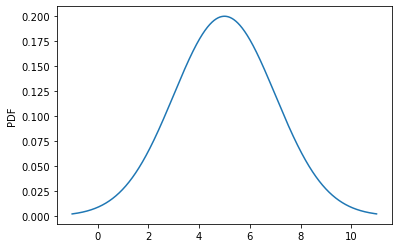

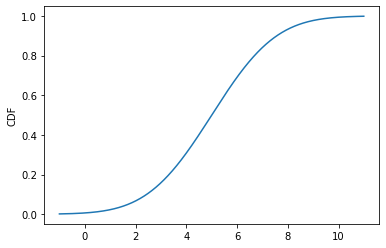

In [7]:
import matplotlib.pyplot as plt

plt.plot(bins, PDF)
plt.ylabel("PDF")
plt.show()

plt.plot(bins, CDF)
plt.ylabel("CDF")
plt.show()

One common practice is to fit a dataset into a distribution. Next is an example.

```{margin} Note on SciPy version
If you are using SciPy locally with a version former than 1.7.0, the choice of `method` in `fit()` is not supported, which leads to the error `TypeError: Unknown arguments: {'method': 'MLE'}` when running the `fit()` function. The solution is to remove the choice of `method` (i.e. `mu, sigma = norm.fit(samples)`).  
```

5.055650656764304 2.0756534192971463


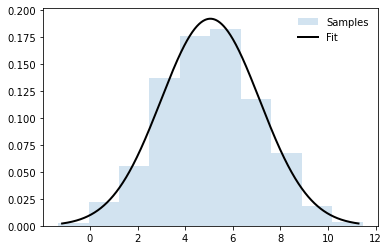

In [8]:
samples = norm.rvs(loc=5, scale=2, size=1000)  # pesudo dataset
mu, sigma = norm.fit(samples, method="MLE")  # do a maximum-likelihood fit
print(mu, sigma)

# Plot figure
bins = np.arange(mu - 3 * sigma, mu + 3 * sigma, 0.01)
plt.hist(samples, density=True, histtype='stepfilled',
         alpha=0.2, label='Samples')
plt.plot(bins, norm.pdf(bins, loc=mu, scale=sigma),
         'k-', lw=2, label='Fit')
plt.legend(loc='best', frameon=False)
plt.show()

::: {note}
The distribution objects in `scipy.stats` could be employed in two ways. The first is to input distribution parameters every time, as in the example above. The other way is to create a **"frozen" distribution** object by fixing the distribution parameters. For example, `distr = norm(loc=5, scale=2)`. The example in the following section of discrete distributions employs this way. 
:::

+ **Discrete distributions**

Some examples are `bernoulli` (Bernoulli distribution), `binom` (binomial distribution), `poisson` (poisson distribution). Similarly, each object of discrete distributions comes with some useful methods, such as its PMF (probability mass function), its CDF (cumulative distribution function), and so on.

In [9]:
from scipy.stats import binom

n, p = 5, 0.4
distr = binom(n, p)  # frozen distribution
x = np.arange(0, 5)

PMF = distr.pmf(x)  # generate PMF in x
CDF = distr.cdf(x)  # generate CDF in x
MMS = distr.stats(moments='mvsk')  # obtain the four moments
RVS = distr.rvs(size=1000)  # generate random variates

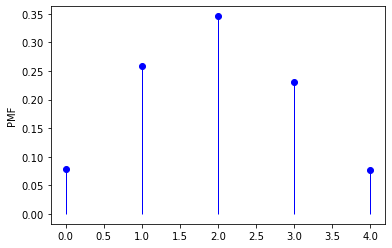

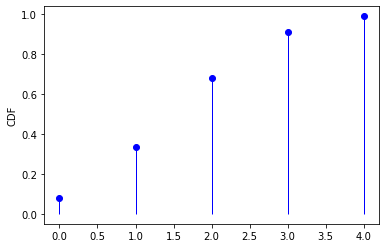

In [10]:
plt.plot(x, PMF, 'bo')
plt.vlines(x, 0, PMF, 'b', lw=1)
plt.ylabel("PMF")
plt.show()

plt.plot(x, CDF, 'bo')
plt.vlines(x, 0, CDF, 'b', lw=1)
plt.ylabel("CDF")
plt.show()

For a full list of probability distributions in `scipy.stats`, please refer to this [official website](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions).

## Statistical Tests

`scipy.stats` contains a lot of common statistical tests, such as `ttest_ind` (T-test for the means of two independent samples), `kstest` (Kolmogorov-Smirnov test for goodness of fit) and so on.

For instance, if we have two sets of observations that we assume are generated from Gaussian processes, we can use a T-test `stats.ttest_ind` to decide whether the means of two sets of observations are significantly different.

In [11]:
a = np.random.normal(0, 1, size=100)  # Sample A
b = np.random.normal(1, 1, size=10)   # Sample B
T, p = stats.ttest_ind(a, b)          # T-test
print(T, p)

-3.3344152893762242 0.0011719701545575287


The resulting output in this case is composed of:
* T statistic value: a number the sign of which is proportional to the difference between the two random processes and the magnitude is related to the significance of this difference.
* p value: the probability of both processes being identical. If it is close to 1, the two processes are almost certainly identical. The closer it is to zero, the more likely it is that the processes have different means.

For a full list of supported statistical tests in `scipy.stats`, please refer to this [official website](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

## Correlations

`scipy.stats` contains some basic correlation functions, such as `pearsonr` (Pearson correlation coefficient), `spearmanr` (Spearman correlation coefficient), `kendalltau` (Kendall’s tau correlation measure). Next is an example of Kendall’s tau correlation for annual rainfall.

In [12]:
dr = pd.read_csv('../../assets/data/Changi_daily_rainfall.csv', index_col=0, header=0, parse_dates=True)
yr = dr.resample("Y", label="right").sum()  # aggregate annual rainfall total
yr.index = yr.index.year
yr.columns = ["Yearly Rainfall Total (mm)"]
print(yr.head())

tau, p = stats.kendalltau(yr.index, yr)
# tau is Kendall’s tau measure and p is the corresponding p-value
print(tau, p)

      Yearly Rainfall Total (mm)
Date                            
1981                      1336.3
1982                      1581.7
1983                      1866.5
1984                      2686.7
1985                      1483.9
-0.0358974358974359 0.7442511261559122


For more advanced regression models, you may refer to [statistical model package](https://www.statsmodels.org/stable/api.html?highlight=regression) `statsmodels` or the [machine learning package](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) `sklearn`. A brief beginner guide of this could also be found in [RealPython](https://realpython.com/linear-regression-in-python/).

## Extreme Value Analysis

Extreme value analysis (EVA) is a process primarily to estimate the probability of events that are more extreme than any previously observed. It is widely applied in many fields such as engineering, meteorology, hydrology, finance, etc. For example, we could use EVA to estimate the probability distributions of extreme hydrological events and correspondingly estimate the magnitudes of extreme hydrological events under specific return periods.

In this section, we will take a time series of streamflow as an example to show the extreme value analysis for <u>**annual 5-day low-flow**</u> in Python step by step.

### Extract extreme values

We first load the daily streamflow data from the file using `pandas` and calculate the 5-day moving average of streamflow. Extreme events are collected from each year by picking the minimum 5-day low-flow.

In [13]:
# Load Data
ds = pd.read_csv('../../assets/data/Streamflow_02401390.dat', delimiter='\s+', 
                 index_col=0, header=None, parse_dates=True)
ds.columns = ["Streamflow"]
ds.index.name = 'Date'
ds.head()

,Streamflow
Date,
1981-01-01,40.0
1981-01-02,39.0
1981-01-03,41.0
1981-01-04,39.0
1981-01-05,37.0


            5-day flow
Date                  
1981-01-01         NaN
1981-01-02         NaN
1981-01-03        39.2
1981-01-04        38.4
1981-01-05        39.4
      Annual low-flow
Date                 
1981             11.2
1982             19.2
1983             19.8
1984             17.6
1985             25.4


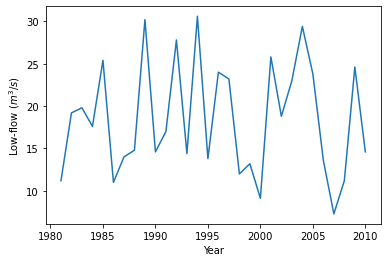

In [14]:
# Calculate 5-day flow
ds5day = ds.rolling(5, center=True).mean()  # moving average
ds5day.columns = ["5-day flow"]
print(ds5day.head())

# Extract annual low-flow
lowf = ds5day.resample("Y").min()  # yearly minimum
lowf.index = lowf.index.year
lowf.columns = ["Annual low-flow"]
print(lowf.head())

# Plot annual 5-day low-flow
plt.plot(lowf)
plt.xlabel("Year")
plt.ylabel("Low-flow ($m^3/s$)")
plt.show()

### Fit distribution (parameter estimation)

Next, we fit a distribution to the annual low-flow extreme events. Here, we assume that annual low-flow follows a generalized extreme value (GEV) distribution `genextreme(c, loc=loc, scale=scale)`, which has three parameters: `loc` (location parameter), `scale` (scale parameter) and `c` (shape parameter).

In [15]:
from scipy.stats import genextreme as gev

Here, we introduce two methods to estimate the parameters, including the **maximum likelihood method (MLE)** and the **method of L-moments**.

+ Maximum likelihood method (MLE)

```{margin} Note on SciPy version
If you are using SciPy locally with a version former than 1.7.0, there will be accidental `ValueError` when running the `fit()` function. This is due to the incompatibility of `fit()` function with DataFrame in old versions. The solution is to only input values (NumPy Array) in fitting (i.e. `c0, loc0, scale0  = gev.fit(lowf.values)`).  
```

In [16]:
c0, loc0, scale0  = gev.fit(lowf, method="MLE")
print(loc0, scale0, c0)
MLEGEV = gev(c0, loc=loc0, scale=scale0)  # Frozen distribution

15.808425716808408 5.941316015077605 0.16158787388446866


+ Method of L-moments (LMM)

In the context of EVA, observations tend to follow a distribution more complicated than the normal distribution. The method of L-moments is more recommended in this case compared to MLE (more details referred to [WikiPedia](https://en.wikipedia.org/wiki/L-moment#:~:text=L%2Dmoments%20are%20far%20more%20meaningful%20when%20dealing%20with%20outliers%20in%20data%20than%20conventional%20moments)). However, `scipy.stats` only includes the common MLE method and method of moments for parameter estimation. We need to code the method of L-moments on our own.

The L-moments are established based on the probability weighted moments. To be specific, they are linear combinations of probability weighted moments. The probability weighted moments are defined as

$
\begin{align}
& \beta_0=\int_{0}^{1} F^{-1}(p)p^0\text{d}p\\
& \beta_1=\int_{0}^{1} F^{-1}(p)p^1\text{d}p \tag{1}\\
& \beta_2=\int_{0}^{1} F^{-1}(p)p^2\text{d}p\\
\end{align}
$

where $x$ is the random variable of interest, $F(x)$ is the cumulative distribution, and $F^{-1}(p)$ is the inverse of cumulative distribution.

The basic idea of the method of L-moments is to **use sample L-moments as the estimates of population L-moments**. Then, if we could get the relationships between the population L-moments and the distribution parameters, we could get the estimates of parameters by plugging sample L-moments. In order to calculate L-moments of samples, we need to calculate probability weighted moments of samples at first. Assume a set of samples $X_j\ (X_1>X_2>...>X_n)$, probability weighted moments of samples are 

$
\begin{align}
& b_0=\overline{X} \\
& b_1=\sum_{j=1}^{n-1} \frac{(n-j)X_j}{n(n-1)} \tag{2}\\
& b_2=\sum_{j=1}^{n-2} \frac{(n-j)(n-j-1)X_j}{n(n-1)(n-2)}\\
\end{align}
$

where $b_0, b_1, b_2$ are the first three unbiased probability weighted moments of samples.

The relationship between the first three L-moments and probability weighted moments are 

$
\begin{align}
& \lambda_1=b_0\\
& \lambda_2=2b_1-b_0 \tag{3}\\
& \lambda_3=6b_2-6b_1+b_0\\
\end{align}
$

where $\lambda_1, \lambda_2, \lambda_3$ are the first three L-moments. By plugging equation (2) into equation (3), we could obtain the sample L-moments.

In [17]:
# Calculate samples L-moments

def samlmom3(sample):
    """
    samlmom3 returns the first three L-moments of samples
    sample is the 1-d array
    n is the total number of the samples, j is the j_th sample
    """
    n = len(sample)
    sample = np.sort(sample.reshape(n))[::-1]
    b0 = np.mean(sample)
    b1 = np.array([(n - j - 1) * sample[j] / n / (n - 1)
                   for j in range(n)]).sum()
    b2 = np.array([(n - j - 1) * (n - j - 2) * sample[j] / n / (n - 1) / (n - 2)
                   for j in range(n - 1)]).sum()
    lmom1 = b0
    lmom2 = 2 * b1 - b0
    lmom3 = 6 * (b2 - b1) + b0

    return lmom1, lmom2, lmom3


LMM = samlmom3(lowf["Annual low-flow"].values)
print(LMM)

(18.5, 3.8837241379310328, 0.37207881773398555)


[Hosking (1990; Table 1)](https://www.jstor.org/stable/2345653?origin=JSTOR-pdf) has proven that for the GEV distribution, the relationships between the L-moments and distribution parameters are 

$
\begin{align}
\lambda_1 & =\mu+\sigma[1-\Gamma(1+\xi)]/\xi \\
\lambda_2 & =\sigma(1-2^{-\xi})\Gamma(1+\xi)/\xi \tag{4} \\
\frac{\lambda_3}{\lambda_2} & =\frac{2(1-3^{-\xi})}{1-2^{-\xi}}-3
\end{align}
$

where $\mu, \sigma, \xi$ are respectively GEV's location `loc`, scale `scale`, and shape `c` parameters. Obviously, there are no explicit solutions to these equations when we plugin the sample L-moments. Luckily, we could resort to the function solver `scipy.optimize.fsolve` in the optimization sub-module of SciPy to get numerical solutions.

In [18]:
# Estimate GEV parameters using the function solver

from scipy.optimize import fsolve
import math

def pargev_fsolve(lmom):
    """
    pargev_fsolve estimates the parameters of the Generalized Extreme Value 
    distribution given the L-moments of samples
    """
    lmom_ratios = [lmom[0], lmom[1], lmom[2] / lmom[1]]
    f = lambda x, t: 2 * (1 - 3**(-x)) / (1 - 2**(-x)) - 3 - t
    G = fsolve(f, 0.01, lmom_ratios[2])[0]
    para3 = G
    GAM = math.gamma(1 + G)
    para2 = lmom_ratios[1] * G / (GAM * (1 - 2**-G))
    para1 = lmom_ratios[0] - para2 * (1 - GAM) / G
    return para1, para2, para3

loc1, scale1, c1 = pargev_fsolve(LMM)
print(loc1, scale1, c1)

15.587575273199434 6.18294944388195 0.11881321836725452


Alternatively, a numerical approximation method for the solution of equation (4) was proposed by [Donaldson (1996)](https://www.tandfonline.com/doi/abs/10.1080/03610919608813340).

In [19]:
# Estimate GEV parameters using numerical approximations

from scipy import special
import math

def pargev(lmom):
    """
    pargev returns the parameters of the Generalized Extreme Value 
    distribution given the L-moments of samples
    """
    lmom_ratios = [lmom[0], lmom[1], lmom[2]/lmom[1]]
    
    SMALL = 1e-5
    eps = 1e-6
    maxit = 20
    
    # EU IS EULER'S CONSTANT
    EU = 0.57721566
    DL2 = math.log(2)
    DL3 = math.log(3)

    # COEFFICIENTS OF RATIONAL-FUNCTION APPROXIMATIONS FOR XI
    A0 = 0.28377530
    A1 = -1.21096399
    A2 = -2.50728214
    A3 = -1.13455566
    A4 = -0.07138022
    B1 = 2.06189696
    B2 = 1.31912239
    B3 = 0.25077104
    C1 = 1.59921491
    C2 = -0.48832213
    C3 = 0.01573152
    D1 = -0.64363929
    D2 = 0.08985247
    
    T3 = lmom_ratios[2]
    if lmom_ratios[1] <= 0 or abs(T3) >= 1:
        raise ValueError("Invalid L-Moments")
    
    if T3 <= 0:
        G = (A0 + T3 * (A1 + T3 * (A2 + T3 * (A3 + T3 * A4)))) / (1 + T3 * (B1 + T3 * (B2 + T3 * B3)))

        if T3 >= -0.8:
            para3 = G
            GAM = math.exp(special.gammaln(1 + G))
            para2 = lmom_ratios[1] * G / (GAM * (1 - 2**-G))
            para1 = lmom_ratios[0] - para2 * (1 - GAM) / G
            return para1, para2, para3
        elif T3 <= -0.97:
            G = 1 - math.log(1 + T3) / DL2

        T0 = (T3 + 3) * 0.5
        for IT in range(1, maxit):
            X2 = 2 ** -G
            X3 = 3 ** -G
            XX2 = 1 - X2
            XX3 = 1 - X3
            T = XX3 / XX2
            DERIV = (XX2 * X3 * DL3 - XX3 * X2 * DL2) / (XX2**2)
            GOLD = G
            G -= (T - T0) / DERIV

            if abs(G - GOLD) <= eps * G:
                para3 = G
                GAM = math.exp(special.gammaln(1 + G))
                para2 = lmom_ratios[1] * G / (GAM * (1 - 2**-G))
                para1 = lmom_ratios[0] - para2 * (1 - GAM) / G
                return para1, para2, para3
        raise Exception("Iteration has not converged")
    else:
        Z = 1 - T3
        G = (-1 + Z * (C1 + Z * (C2 + Z * C3))) / (1 + Z * (D1 + Z * D2))
        if abs(G) < SMALL:
            para2 = lmom_ratios[1] / DL2
            para1 = lmom_ratios[0] - EU * para2
            para3 = 0
        else:
            para3 = G
            GAM = math.exp(special.gammaln(1 + G))
            para2 = lmom_ratios[1] * G / (GAM * (1 - 2**-G))
            para1 = lmom_ratios[0] - para2 * (1 - GAM) / G
        return para1, para2, para3


loc1, scale1, c1 = pargev(LMM)
print(loc1, scale1, c1)
LMMGEV = gev(c1, loc=loc1, scale=scale1)  # Frozen distribution

15.587575475184854 6.182949767501039 0.11881328920002591


We could observe that both the function solver and numerical approximations generate almost the same results of distribution parameters.

### Compare with empirical distribution

Although we have obtained the estimated probability distribution of annual low-flow by parameter estimation, it is necessary to examine its performance in characterizing the observation datasets. Here, we first examine this by directly looking at the ***probability density function (PDF)*** and ***cumulative distribution function (CDF)***; then, we examine this through ***statistical inference***.

+ Probability density function

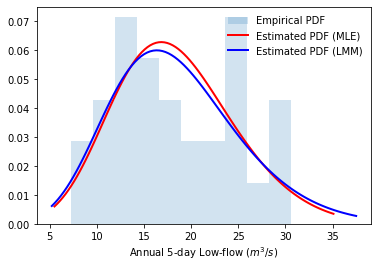

In [20]:
# Plot empirical PDF
plt.hist(lowf, density=True, histtype='stepfilled',
         alpha=0.2, label='Empirical PDF')
# Plot estimated PDF based on maximum likelihood method
bins = np.linspace(MLEGEV.ppf(0.01), MLEGEV.ppf(0.99), 100)
plt.plot(bins, MLEGEV.pdf(bins),
         'r-', lw=2, label='Estimated PDF (MLE)')
# Plot estimated PDF based on the method of L-moments
bins = np.linspace(LMMGEV.ppf(0.01), LMMGEV.ppf(0.99), 100)
plt.plot(bins, LMMGEV.pdf(bins),
         'b-', lw=2, label='Estimated PDF (LMM)')

plt.xlabel("Annual 5-day Low-flow ($m^3/s$)")
plt.legend(loc='best', frameon=False)
plt.show()

+ Cumulative distribution function

Since we are often more concerned about the rare cases of extreme events (which lay at the edge of PDF), it is also common practice to plot CDF to have a check.

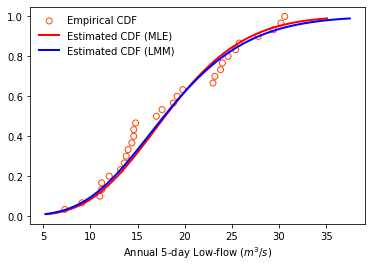

In [21]:
# Plot empirical CDF
plt.scatter(lowf.sort_values(by = ["Annual low-flow"]),
            np.arange(1, lowf.size+1, dtype=float)/lowf.size,
            color = 'orangered', facecolors='none', label='Empirical CDF')
# Plot estimated PDF based on maximum likelihood method
bins = np.linspace(MLEGEV.ppf(0.01), MLEGEV.ppf(0.99), 100)
plt.plot(bins, MLEGEV.cdf(bins), 
         'r-', lw=2, label='Estimated CDF (MLE)')
# Plot estimated PDF based on the method of L-moments
bins = np.linspace(LMMGEV.ppf(0.01), LMMGEV.ppf(0.99), 100)
plt.plot(bins, LMMGEV.cdf(bins), 
         'b-', lw=2, label='Estimated CDF (LMM)')

plt.xlabel("Annual 5-day Low-flow ($m^3/s$)")
plt.legend(loc='best', frameon=False)
plt.show()

+ Statistical inference: Kolmogorov-Smirnov (KS) test

There are several tests available to test the performances of distribution fits. Here we used the Kolmogorov-Smirnov (KS) test, which is available in `scipy.stats.kstest`. This is a two-sided test for the null hypothesis that **the distribution of independent samples is identical to the specified cumulative distribution**. If the KS statistic is small or the p-value is high, then we cannot reject the hypothesis that samples follow the specified distribution.

In [22]:
MLEKS = stats.kstest(lowf["Annual low-flow"], MLEGEV.cdf)
print(MLEKS)
LMMKS = stats.kstest(lowf["Annual low-flow"], LMMGEV.cdf)
print(LMMKS)

KstestResult(statistic=0.16008786925974927, pvalue=0.3845846196401085)
KstestResult(statistic=0.14516854345180497, pvalue=0.5061871580723805)


### Estimate extreme values for specific return periods

One goal of EVA is to estimate the extreme values corresponding to some return periods. In the case of low-flow, the relationship between the non-exceedance probability and the return period is

$$P(X\leq x_{T})=\frac{1}{T}$$

where $x_{T}$ is the extreme annual 5-day low-flow corresponding to the return period of $T$.

               Annual 5-day low-flow
Return period                       
2                          17.922767
5                          12.869493
10                         10.503747
100                         5.517358
1000                        2.330862
               Annual 5-day low-flow
Return period                       
2                          17.805074
5                          12.560429
10                         10.166638
100                         5.234184
1000                        2.154865


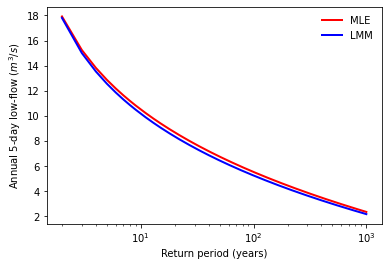

In [23]:
# return periods from 2 years to 1000 years
T = np.arange(2, 1001)

# extreme low-flow under each return period
LFTmle = MLEGEV.ppf(1.0 / T)
LFTmle = pd.DataFrame(LFTmle, index=T, columns=["Annual 5-day low-flow"])
LFTmle.index.name = "Return period"
print(LFTmle.loc[[2, 5, 10, 100, 1000]])

LFTlmm = LMMGEV.ppf(1.0 / T)
LFTlmm = pd.DataFrame(LFTlmm, index=T, columns=["Annual 5-day low-flow"])
LFTlmm.index.name = "Return period"
print(LFTlmm.loc[[2, 5, 10, 100, 1000]])

# Plot low-flow vs return periods
plt.plot(LFTmle, 'r-', lw=2, label='MLE')
plt.plot(LFTlmm, 'b-', lw=2, label='LMM')
plt.xscale('log')
plt.ylabel('Annual 5-day low-flow ($m^3/s$)')
plt.xlabel('Return period (years)')
plt.legend(loc='best', frameon=False)
plt.show()

## References
+ This tutorial was edited based on [Python Statistics Fundamentals](https://realpython.com/python-statistics/), [Scipy Lecture Notes](https://scipy-lectures.org/), [royalosyin's guide to carry out EVA](https://github.com/royalosyin/A-Beginner-Guide-to-Carry-out-Extreme-Value-Analysis-with-Codes-in-Python) and [OpenHydrology's lmoments3 repository](https://github.com/OpenHydrology/lmoments3).
+ Only the `scipy.stats` sub-module is introduced here. If you wish to get a quick glimpse on other sub-modules of SciPy, you could refer to [scipy-lectures](https://scipy-lectures.org/intro/scipy.html).